# Import Dependencies

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Data Collection and Processing

In [3]:
#loading the dataset to pandas DataFrame
df=pd.read_csv("loan-dataset.csv")

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
# printing the first 5 rows of the dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# number of rows and columns
df.shape

(614, 13)

In [7]:
# statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# filling the missing values
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# label encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [12]:
# Dependent column values
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
# replacing the value of 3+ to 4
df=df.replace(to_replace='3+',value=4)

In [14]:
df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

# Data Visualization

<AxesSubplot: xlabel='Education', ylabel='count'>

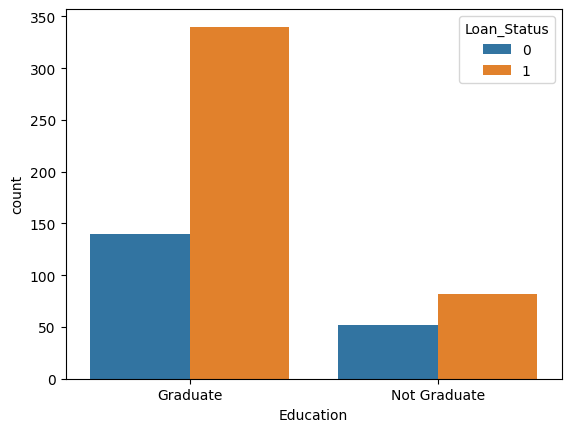

In [16]:
# education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot: xlabel='Married', ylabel='count'>

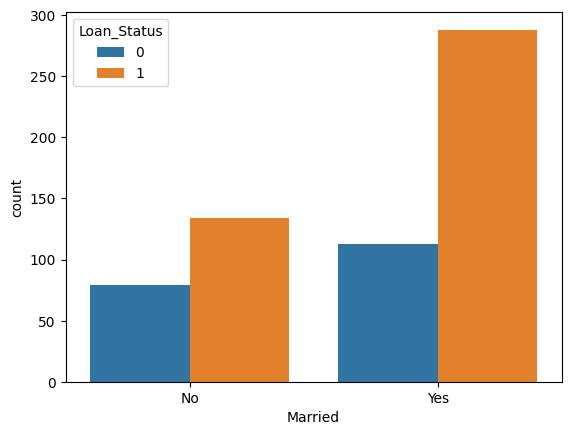

In [17]:
# marital status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=df)

<AxesSubplot: xlabel='Dependents', ylabel='count'>

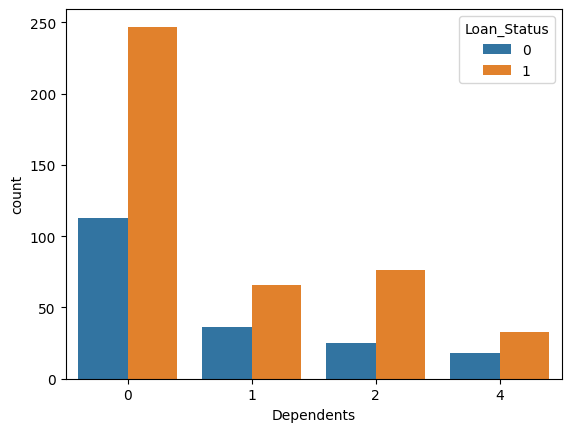

In [18]:
# Dependents and loan status
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

<AxesSubplot: xlabel='Gender', ylabel='count'>

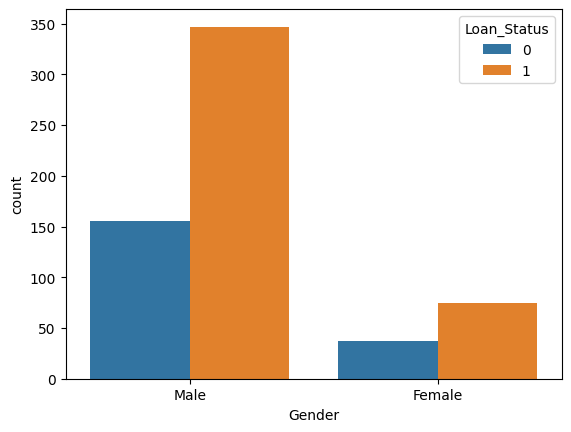

In [19]:
# Gender and loan status
sns.countplot(x='Gender',hue='Loan_Status',data=df)

In [24]:
# convert categorical columns to numerical values
df.replace({"Married":{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Urban':2,'Semiurban':1,'Rural':0},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [27]:
# seperating the data and label
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

In [28]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# Train Test Split

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(614, 11) (552, 11) (62, 11)


# Training the model:

# Support Vector Machine Model

In [31]:
classifier=svm.SVC(kernel='linear')

In [33]:
# training the support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

# Model Evaluation

In [35]:
# accuracy score on training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [36]:
print("accuracy on training data:",training_data_accuracy)

accuracy on training data: 0.8134057971014492


In [37]:
# accuracy score on test data
X_test_prediction=classifier.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [38]:
print("accuracy on test data:",testing_data_accuracy)

accuracy on test data: 0.8064516129032258


# Random Forest Classification Model

In [48]:
rf_clf=RandomForestClassifier()

In [49]:
# training the Random Forest Classification Model
rf_clf.fit(X_train,Y_train)

RandomForestClassifier()

# Model Evaluation

In [50]:
# accuracy score on training data
X_train_prediction=rf_clf.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [51]:
print("acc of random forest clf is",training_data_accuracy)

acc of random forest clf is 1.0


In [52]:
# accuracy score on testing data
X_test_prediction=rf_clf.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [53]:
print("acc of random forest clf is",testing_data_accuracy)

acc of random forest clf is 0.7580645161290323


# Naive Bayes Model

In [54]:
nb_clf=GaussianNB()

In [55]:
# training the Naive Bayes Model
nb_clf.fit(X_train,Y_train)

GaussianNB()

# Model Evaluation

In [56]:
# accuracy score on training data
X_train_prediction=nb_clf.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [57]:
print("acc of naive bayes clf is",training_data_accuracy)

acc of naive bayes clf is 0.802536231884058


In [58]:
# accuracy score on testing data
X_test_prediction=nb_clf.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [59]:
print("acc of naive bayes clf is",testing_data_accuracy)

acc of aive bayes clf is 0.7741935483870968


# Decision Tree Classification Model

In [61]:
dt_clf=DecisionTreeClassifier()

In [62]:
# training the Decision Tree Model
dt_clf.fit(X_train,Y_train)

DecisionTreeClassifier()

# Model Evaluation

In [63]:
# accuracy score on training data
X_train_prediction=dt_clf.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [64]:
print("acc of decision tree clf is",training_data_accuracy)

acc of decision tree clf is 1.0


In [65]:
# accuracy score on testing data
X_test_prediction=dt_clf.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [66]:
print("acc of decision tree clf is",testing_data_accuracy)

acc of decision tree clf is 0.6612903225806451


# KNeighbors Classification Model

In [69]:
kn_clf=KNeighborsClassifier()

In [70]:
# training the KNeighbors Model
kn_clf.fit(X_train,Y_train)

KNeighborsClassifier()

# Model Evaluation

In [71]:
# accuracy score on training data
X_train_prediction=kn_clf.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [72]:
print("acc of KNeighbors clf is",training_data_accuracy)

acc of KNeighbors clf is 0.7355072463768116


In [73]:
# accuracy score on testing data
X_test_prediction=kn_clf.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [74]:
print("acc of KNeighbors clf is",testing_data_accuracy)

acc of KNeighbors clf is 0.6451612903225806


# Gradient Boosting Classification Model

In [76]:
gb_clf=GradientBoostingClassifier()

In [77]:
# training the Gradient Boosting Model
gb_clf.fit(X_train,Y_train)

GradientBoostingClassifier()

# Model Evaluation

In [78]:
# accuracy score on training data
X_train_prediction=gb_clf.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [79]:
print("acc of Gradient Boosting clf is",training_data_accuracy)

acc of Gradient Boosting clf is 0.8967391304347826


In [80]:
# accuracy score on testing data
X_test_prediction=gb_clf.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [81]:
print("acc of Gradient Boosting clf is",testing_data_accuracy)

acc of Gradient Boosting clf is 0.7580645161290323
